In [1]:
library(ncdf4)
library(lattice)
library(rgdal)
library(raster)
library(rasterVis)
library(latticeExtra)
library(gridExtra)
library(RColorBrewer)
library(animation)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 
Loading required package: latticeExtra
Loading required package: RColorBrewer


In [2]:
path <- "/Users/dongmeichen/Documents/defense/data/"
years <- 1996:2015; nyr <- length(years)
var <- "winterTmin"
out <- "/Users/dongmeichen/Documents/defense/figures/"

In [3]:
ncin <- nc_open("/Users/dongmeichen/Documents/beetle/ncfiles/na10km_v2.nc")
x <- ncvar_get(ncin, varid="x"); nx <- length(x)
y <- ncvar_get(ncin, varid="y"); ny <- length(y)
grid <- expand.grid(x=x, y=y)

In [4]:
shppath <- "/Users/dongmeichen/Documents/beetle/shp"
canada.prov <- readOGR(dsn = shppath, layer = "na10km_can_prov")
us.states <- readOGR(dsn = shppath, layer = "na10km_us_state")
crs <- proj4string(us.states)
lrglakes <- readOGR(dsn = shppath, layer = "na10km_lrglakes")
proj4string(lrglakes) <- crs

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_can_prov"
with 13 features
It has 2 fields
OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_us_state"
with 51 features
It has 2 fields
OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_lrglakes"
with 24 features
It has 2 fields


In [5]:
cutpts <- c(-55,-40,-30,-20,-15,-10,-5,0,5,15,30)

In [9]:
get.data <- function(var){
  ncfile <- paste0("na10km_v2_",var, "_",years[1],".",years[nyr],".4d.nc")
  ncin <- nc_open(paste0(path, ncfile))
  data <- ncvar_get(ncin,var)
  fillvalue <- ncatt_get(ncin,var,"_FillValue")
  data[data==fillvalue$value] <- NA
  return(data)
}

In [7]:
btlprs <- read.csv("/Users/dongmeichen/Documents/defense/data/beetle_presence_updated.csv")

In [10]:
var_4d <- get.data(var)

In [11]:
i <- 1
var_4d_slice <- var_4d[,,1,i]

Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”

                         x        y
cellcentre.offset -5730000 -4510000
cellsize             10000    10000
cells.dim             1074      900

Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

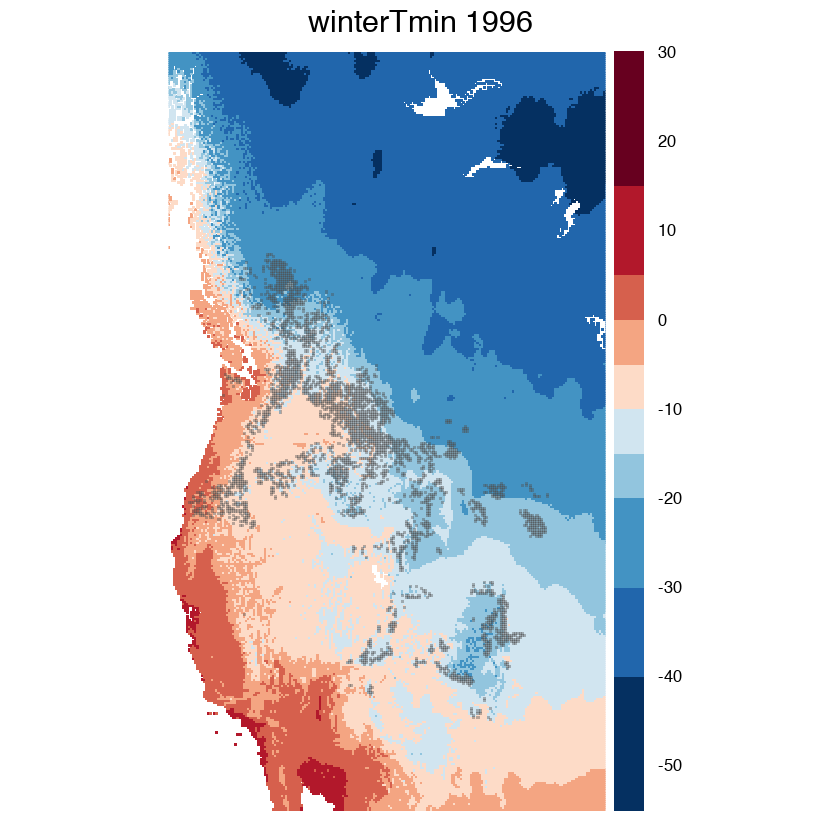

In [20]:
p <- levelplot(var_4d_slice ~ x * y, data=grid, at=cutpts, cuts=11, pretty=T, 
                col.regions=rev(brewer.pal(10,"RdBu")), xlim=c(-2050000,20000), ylim=c(-2000000,1600000),
                par.settings = list(axis.line = list(col = "transparent")), aspect="iso", 
                scales = list(draw = FALSE), margin=F, main=list(label=paste(var,years[i]), cex=1.5),
                xlab="",ylab="")
df <- btlprs[,c("x","y",paste0("prs_",(years[i]+1)))]
coordinates(df) <- c("x","y")
points2grid(df)
btl_pixels <- as(df, "SpatialPixelsDataFrame")
names(btl_pixels) <- "btlprs"
p <- p + latticeExtra::layer(sp.points(btl_pixels[btl_pixels$btlprs==1,], pch=19, cex=0.05, col='#525252', alpha=0.4))
p

In [21]:
for(i in 1:length(years)){
    var_4d_slice <- var_4d[,,1,i]
    p <- levelplot(var_4d_slice ~ x * y, data=grid, at=cutpts, cuts=11, pretty=T, 
                col.regions=rev(brewer.pal(10,"RdBu")), xlim=c(-2050000,20000), ylim=c(-2000000,1600000),
                par.settings = list(axis.line = list(col = "transparent")), aspect="iso", 
                scales = list(draw = FALSE), margin=F, main=list(label=paste(var,years[i]), cex=1.5),
                xlab="",ylab="")
    p <- p + latticeExtra::layer(sp.polygons(canada.prov, lwd=0.8, col='dimgray', alpha=0.3))
    p <- p + latticeExtra::layer(sp.polygons(us.states, lwd=0.8, col='dimgray', alpha=0.3))
    p <- p + latticeExtra::layer(sp.polygons(lrglakes, lwd=0.8, col='dimgray', fill='lightblue', alpha=0.3))
    df <- btlprs[,c("x","y",paste0("prs_",(years[i]+1)))]
    coordinates(df) <- c("x","y")
    points2grid(df)
    btl_pixels <- as(df, "SpatialPixelsDataFrame")
    names(btl_pixels) <- "btlprs"
    p <- p + latticeExtra::layer(sp.points(btl_pixels[btl_pixels$btlprs==1,], pch=19, cex=0.05, col='#525252', alpha=0.4))
    png(paste0(out, "bioclimatic_map_",var,"_",years[i],".png"), width=4, height=6, units="in", res=300)
    print(p)
    dev.off()
    print(paste("mapping", var, "in", years[i], "is done!"))
}

Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 1996 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 1997 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 1998 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 1999 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2000 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2001 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2002 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2003 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2004 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2005 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2006 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2007 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2008 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2009 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2010 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2011 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2012 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2013 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2014 is done!"


Warning message in points2grid(df):
“grid has empty column/rows in dimension 1”Warning message in points2grid(points, tolerance, round):
“grid has empty column/rows in dimension 1”

[1] "mapping winterTmin in 2015 is done!"


In [22]:
im.convert(paste0(out, "bioclimatic_map_winterTmin_*.png"),
           output=paste0(out, "bioclimatic_map_winterTmin.gif"))

Executing: 
convert -loop 0 -delay 100
    /Users/dongmeichen/Documents/defense/figures/bioclimatic_map_winterTmin_*.png
    'bioclimatic_map_winterTmin.gif'
Output at: bioclimatic_map_winterTmin.gif
